<a href="https://colab.research.google.com/github/AitorNoel/PontiaProyectoJupiter/blob/main/BIGDATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!pip install pyarrow

In [4]:
archivo_path = 'Sales_data.ftr'

data = pd.read_feather('/content/drive/MyDrive/PONTIA/DA NEGOCIO/Sales_data.ftr')

##LIMPIEZA Y FORMATO



In [5]:
data.head(6)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,None,None,None,None,None,None
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [6]:
data.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [8]:
data.shape

(186850, 6)

In [9]:
#ANALIZAMOS LOS NULOS
data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
#ELIMINAMOS LOS NULOS (con el how=all si todas las filas son nulos nos lo elimina)
data=data.dropna(how="all")

In [11]:
data.shape

(186305, 6)

In [12]:
data.duplicated()

0         False
2         False
3         False
4         False
5         False
          ...  
186845    False
186846    False
186847    False
186848    False
186849    False
Length: 186305, dtype: bool

In [13]:
#nos identifica si hay dos filas que son exactamente iguales
data[data.duplicated()]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215"
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1302,177795,Apple Airpods Headphones,1,150,04/27/19 19:45,"740 14th St, Seattle, WA 98101"
1684,178158,USB-C Charging Cable,1,11.95,04/28/19 21:13,"197 Center St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186738,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186782,259296,Apple Airpods Headphones,1,150,09/28/19 16:48,"894 6th St, Dallas, TX 75001"


In [14]:
#eliminamos las filas duplicadas, pero siempre nos mantiene una de ellas
data = data.drop_duplicates()

In [15]:
#vemos el campo "order date" contiene el formato: mm/dd/yy hh:mm
data['Order Date'][0]

'04/19/19 08:46'

In [16]:
#nos queremos quedar con la primera parte:
'04/19/19 08:46'.split(' ')[0]

'04/19/19'

In [17]:
#y de la primera parte nos queremos quedar con el mes:
'04/19/19 08:46'.split(' ')[0].split('/')[0]

'04'

In [18]:
#y ahora solo nos queremos quedar con el mes:
data['Order Date'][0].split('/')[0]

'04'

In [19]:
#creamos una funcion para aplicarla al df:
def extraer_mes(x):
  return x.split('/')[0]

In [35]:
#aplicamos la funcion extraer el mes:
data['Month']=data['Order Date'].apply(extraer_mes)

In [36]:
data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
Month               object
dtype: object

In [40]:
#cambiamos de objecta integer
data['Month'] = pd.to_numeric(data['Month'], errors='coerce').fillna(0).astype(int)


In [44]:
#cambiamos de object a integer y float
data['Quantity Ordered']=pd.to_numeric(data['Quantity Ordered'],errors='coerce').fillna(0).astype(int)
data['Price Each']=pd.to_numeric(data['Price Each'],errors='coerce').fillna(0).astype(float)

In [46]:
data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
dtype: object

##calculamos las ventas del mes

In [48]:
data['sales']= data['Quantity Ordered']*data['Price Each']
data['sales']

0          23.90
2          99.99
3         600.00
4          11.99
5          11.99
           ...  
186845      8.97
186846    700.00
186847    700.00
186848    379.99
186849     11.95
Name: sales, Length: 185687, dtype: float64

##agrupamos la info por mes

In [50]:
data.groupby(['Month'])['sales'].sum()

Month
0           0.00
1     1821413.16
2     2200078.08
3     2804973.35
4     3389217.98
5     3150616.23
6     2576280.15
7     2646461.32
8     2241083.37
9     2094465.69
10    3734777.86
11    3197875.05
12    4608295.70
Name: sales, dtype: float64

##visualizaciones:

<Axes: xlabel='Month'>

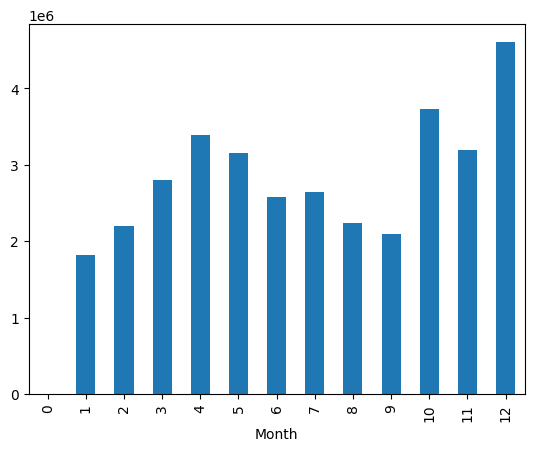

In [52]:
data.groupby(['Month'])['sales'].sum().plot(kind='bar')

#que ciudad tiene el pedido maximo?

In [53]:
data['city'] = data ['Purchase Address'].str.split(",").str[1].str.strip()
datos_ciudad =data.groupby('city').sum('Quantity Ordered').reset_index()

<Axes: xlabel='city'>

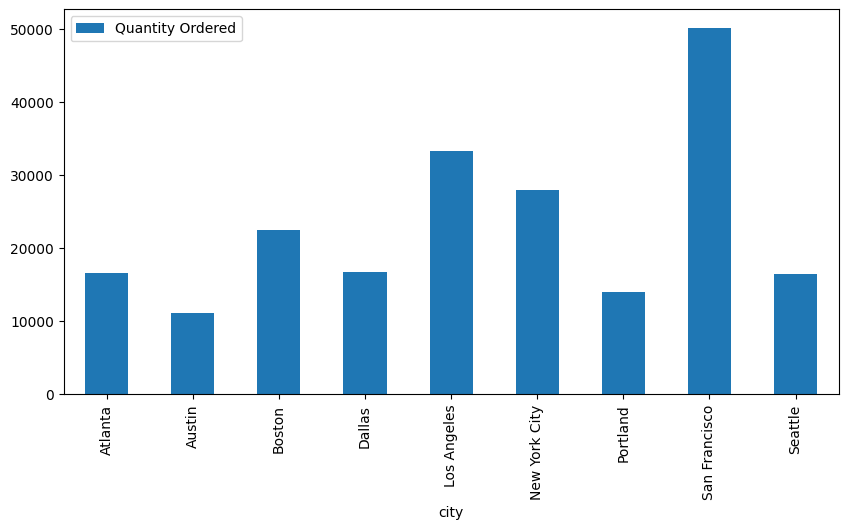

In [56]:
datos_ciudad.plot(x='city',y='Quantity Ordered',kind="bar",figsize=(10,5))

In [54]:
datos_ciudad2=data.groupby(['city']).agg({'Quantity Ordered':"count"}).reset_index()
datos_ciudad2

,city,Quantity Ordered
0,Atlanta,14863
1,Austin,9890
2,Boston,19901
3,Dallas,14797
4,Los Angeles,29564
5,New York City,24847
6,Portland,12449
7,San Francisco,44662
8,Seattle,14713


<Axes: xlabel='city'>

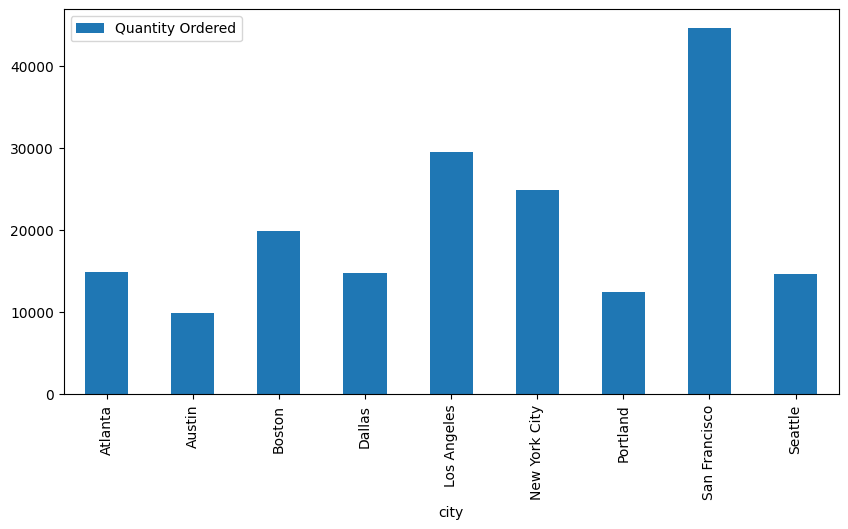

In [55]:
datos_ciudad2.plot(x='city',y='Quantity Ordered',kind="bar",figsize=(10,5))

#QUE PRODUCTO SE VENDIO MAS Y PORQUE:

In [58]:
product_max = data.groupby(['Product']).agg({'Quantity Ordered':'sum','Price Each':'mean'}).reset_index()
product_max

,Product,Quantity Ordered,Price Each
0,20in Monitor,4126,109.99
1,27in 4K Gaming Monitor,6239,389.99
2,27in FHD Monitor,7541,149.99
3,34in Ultrawide Monitor,6192,379.99
4,AA Batteries (4-pack),27615,3.84
5,AAA Batteries (4-pack),30986,2.99
6,Apple Airpods Headphones,15637,150.00
7,Bose SoundSport Headphones,13430,99.99
8,Flatscreen TV,4813,300.00
9,Google Phone,5529,600.00


<Axes: xlabel='Product'>

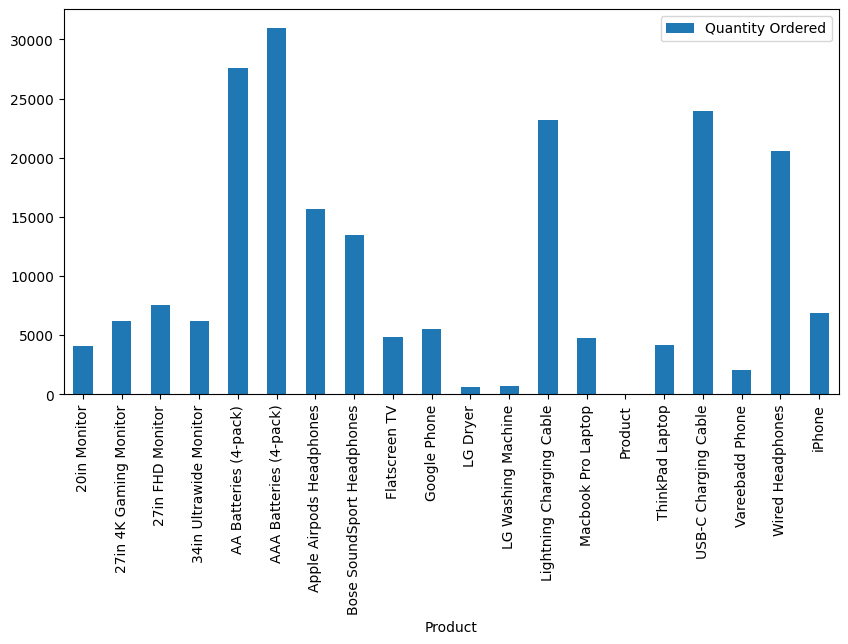

In [59]:
product_max.plot(x='Product',y='Quantity Ordered',kind="bar",figsize=(10,5))

In [22]:
#nos lo cambiamos de nombre para ir haciendo pruebas
df3=data

In [23]:
#condicion de quedarme todos los valores de la columna producto que no tenga la palabra "producto"
df3['Product'] !='Product'

0         True
2         True
3         True
4         True
5         True
          ... 
186845    True
186846    True
186847    True
186848    True
186849    True
Name: Product, Length: 185687, dtype: bool

In [24]:
#aqui no habrá ninguna fila con los valores que me molestaban
df3=df3[df3['Product'] !='Product']
df3

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [25]:
df3['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', '700.0', '1700.0', '150.0', '300.0',
       '400.0'], dtype=object)